In [1]:
from collections import OrderedDict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

# Object Creation

In [2]:
#Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
#Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.239261,1.006592,-1.178671,0.107183
2013-01-02,0.090546,-1.480551,-1.272016,1.114019
2013-01-03,0.794162,0.697346,-0.899506,-0.457206
2013-01-04,-0.956680,-0.115433,1.285542,0.224014
2013-01-05,0.226375,-2.541568,0.127139,1.438788
2013-01-06,-1.565900,2.637870,3.205043,-0.347749


In [4]:
#Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({ 
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
    'D' : np.array([3] * 4,dtype='int32'),
    'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo' })
display(df2.dtypes)
display(df2)

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


# Viewing Data

In [5]:
# See the top & bottom rows of the frame
df.head()
df.tail(3)

,A,B,C,D
2013-01-04,-0.956680,-0.115433,1.285542,0.224014
2013-01-05,0.226375,-2.541568,0.127139,1.438788
2013-01-06,-1.565900,2.637870,3.205043,-0.347749


In [6]:
# Display the index, columns, and the underlying numpy data
df.values
display(df.index)
display(df.columns)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

Index(['A', 'B', 'C', 'D'], dtype='object')

In [7]:
#Describe shows a quick statistic summary of your data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.195373,0.034043,0.211255,0.346508
std,0.881549,1.850181,1.760097,0.772319
min,-1.565900,-2.541568,-1.272016,-0.457206
25%,-0.694874,-1.139271,-1.108880,-0.234016
50%,0.158460,0.290957,-0.386183,0.165598
75%,0.236040,0.929280,0.995941,0.891518
max,0.794162,2.637870,3.205043,1.438788


In [8]:
#Transposing your data
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.239261,0.090546,0.794162,-0.956680,0.226375,-1.565900
B,1.006592,-1.480551,0.697346,-0.115433,-2.541568,2.637870
C,-1.178671,-1.272016,-0.899506,1.285542,0.127139,3.205043
D,0.107183,1.114019,-0.457206,0.224014,1.438788,-0.347749


In [9]:
#Sorting by an axis (0 based)
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.107183,-1.178671,1.006592,0.239261
2013-01-02,1.114019,-1.272016,-1.480551,0.090546
2013-01-03,-0.457206,-0.899506,0.697346,0.794162
2013-01-04,0.224014,1.285542,-0.115433,-0.956680
2013-01-05,1.438788,0.127139,-2.541568,0.226375
2013-01-06,-0.347749,3.205043,2.637870,-1.565900


In [10]:
#Sorting by values
df.sort_values(by='B')

,A,B,C,D
2013-01-05,0.226375,-2.541568,0.127139,1.438788
2013-01-02,0.090546,-1.480551,-1.272016,1.114019
2013-01-04,-0.956680,-0.115433,1.285542,0.224014
2013-01-03,0.794162,0.697346,-0.899506,-0.457206
2013-01-01,0.239261,1.006592,-1.178671,0.107183
2013-01-06,-1.565900,2.637870,3.205043,-0.347749


# Selection

### Getting

In [11]:
#Selecting a single column, which yields a Series, equivalent to df.A
df['A']

2013-01-01    0.239261
2013-01-02    0.090546
2013-01-03    0.794162
2013-01-04   -0.956680
2013-01-05    0.226375
2013-01-06   -1.565900
Freq: D, Name: A, dtype: float64

In [12]:
#Selecting via [], which slices the rows.
display(df[0:3])
display(df['20130102':'20130104'])

,A,B,C,D
2013-01-01,0.239261,1.006592,-1.178671,0.107183
2013-01-02,0.090546,-1.480551,-1.272016,1.114019
2013-01-03,0.794162,0.697346,-0.899506,-0.457206


,A,B,C,D
2013-01-02,0.090546,-1.480551,-1.272016,1.114019
2013-01-03,0.794162,0.697346,-0.899506,-0.457206
2013-01-04,-0.956680,-0.115433,1.285542,0.224014


### Selection by Label (loc - label-location based indexer )

In [13]:
#For getting a cross section using a label (from DatetimeIndex)
df.loc[dates[0]]

A    0.239261
B    1.006592
C   -1.178671
D    0.107183
Name: 2013-01-01 00:00:00, dtype: float64

In [14]:
#Selecting on a multi-axis by label
df.loc[:,['A','B']]

,A,B
2013-01-01,0.239261,1.006592
2013-01-02,0.090546,-1.480551
2013-01-03,0.794162,0.697346
2013-01-04,-0.956680,-0.115433
2013-01-05,0.226375,-2.541568
2013-01-06,-1.565900,2.637870


In [15]:
#Showing label slicing, both endpoints are included
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.090546,-1.480551
2013-01-03,0.794162,0.697346
2013-01-04,-0.956680,-0.115433


In [16]:
#scalar cell value
df.loc[dates[0],'A']
#faster:
df.at[dates[0],'A']

0.23926114039237828

### Selection by Position (iloc)

In [17]:
df.iloc[3]

A   -0.956680
B   -0.115433
C    1.285542
D    0.224014
Name: 2013-01-04 00:00:00, dtype: float64

In [18]:
#slicing
df.iloc[3:5,0:2]
df.iloc[[1,2,4],[0,2]]
df.iloc[1:3,:] #row slice
df.iloc[:,1:3] #col slice
df.iat[1,1]

-1.4805507745778264

### Boolean Indexing

In [19]:
# Using a single column’s values to select data.
df[df.A > 0]

,A,B,C,D
2013-01-01,0.239261,1.006592,-1.178671,0.107183
2013-01-02,0.090546,-1.480551,-1.272016,1.114019
2013-01-03,0.794162,0.697346,-0.899506,-0.457206
2013-01-05,0.226375,-2.541568,0.127139,1.438788


In [20]:
# A where operation for getting.
df[df > 0]

,A,B,C,D
2013-01-01,0.239261,1.006592,NaN,0.107183
2013-01-02,0.090546,NaN,NaN,1.114019
2013-01-03,0.794162,0.697346,NaN,NaN
2013-01-04,NaN,NaN,1.285542,0.224014
2013-01-05,0.226375,NaN,0.127139,1.438788
2013-01-06,NaN,2.637870,3.205043,NaN


In [21]:
# add a col
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.239261,1.006592,-1.178671,0.107183,one
2013-01-02,0.090546,-1.480551,-1.272016,1.114019,one
2013-01-03,0.794162,0.697346,-0.899506,-0.457206,two
2013-01-04,-0.956680,-0.115433,1.285542,0.224014,three
2013-01-05,0.226375,-2.541568,0.127139,1.438788,four
2013-01-06,-1.565900,2.637870,3.205043,-0.347749,three


In [22]:
#Using the isin() method for filtering:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.794162,0.697346,-0.899506,-0.457206,two
2013-01-05,0.226375,-2.541568,0.127139,1.438788,four


### Setting

In [23]:
#Setting a new column automatically aligns the data by the indexes
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.239261,1.006592,-1.178671,0.107183,NaN
2013-01-02,0.090546,-1.480551,-1.272016,1.114019,1.0
2013-01-03,0.794162,0.697346,-0.899506,-0.457206,2.0
2013-01-04,-0.956680,-0.115433,1.285542,0.224014,3.0
2013-01-05,0.226375,-2.541568,0.127139,1.438788,4.0
2013-01-06,-1.565900,2.637870,3.205043,-0.347749,5.0


In [24]:
#Setting values by label
df.at[dates[0],'A'] = 0
# Setting values by position
df.iat[0,1] = 0
# Setting by assigning with a numpy array
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.178671,5,NaN
2013-01-02,0.090546,-1.480551,-1.272016,5,1.0
2013-01-03,0.794162,0.697346,-0.899506,5,2.0
2013-01-04,-0.956680,-0.115433,1.285542,5,3.0
2013-01-05,0.226375,-2.541568,0.127139,5,4.0
2013-01-06,-1.565900,2.637870,3.205043,5,5.0


# Missing Data

In [25]:
#re-index: add a column
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
# set values for a slice
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.178671,5,NaN,1.0
2013-01-02,0.090546,-1.480551,-1.272016,5,1.0,1.0
2013-01-03,0.794162,0.697346,-0.899506,5,2.0,NaN
2013-01-04,-0.956680,-0.115433,1.285542,5,3.0,NaN


In [26]:
# drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.090546,-1.480551,-1.272016,5,1.0,1.0


In [27]:
# fill missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.178671,5,5.0,1.0
2013-01-02,0.090546,-1.480551,-1.272016,5,1.0,1.0
2013-01-03,0.794162,0.697346,-0.899506,5,2.0,5.0
2013-01-04,-0.956680,-0.115433,1.285542,5,3.0,5.0


In [28]:
#get the boolean mask where values are nan
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations

## Stats

In [29]:
# descriptive stats on default axis
display(df.mean())
# descriptive stats on other axis
display(df.mean(1))

A   -0.235250
B   -0.133723
C    0.211255
D    5.000000
F    3.000000
dtype: float64

2013-01-01    0.955332
2013-01-02    0.667596
2013-01-03    1.518400
2013-01-04    1.642686
2013-01-05    1.362389
2013-01-06    2.855402
Freq: D, dtype: float64

In [30]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
display(s)
df.sub(s, axis='index')

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.205838,-0.302654,-1.899506,4.0,1.0
2013-01-04,-3.956680,-3.115433,-1.714458,2.0,0.0
2013-01-05,-4.773625,-7.541568,-4.872861,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

In [31]:
# apply functions to data
display(df.apply(np.cumsum))
display(df.apply(lambda x: x.max() - x.min()))

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.178671,5,NaN
2013-01-02,0.090546,-1.480551,-2.450687,10,1.0
2013-01-03,0.884708,-0.783205,-3.350193,15,3.0
2013-01-04,-0.071972,-0.898637,-2.064651,20,6.0
2013-01-05,0.154402,-3.440206,-1.937512,25,10.0
2013-01-06,-1.411498,-0.802335,1.267530,30,15.0


A    2.360062
B    5.179438
C    4.477059
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [32]:
s = pd.Series(np.random.randint(0, 7, size=10))
display(s)
display(s.value_counts())

0    2
1    5
2    2
3    0
4    4
5    0
6    2
7    0
8    5
9    6
dtype: int64

2    3
0    3
5    2
6    1
4    1
dtype: int64

# Merge

## Concat

In [33]:
# break into pieces and put bck together
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-2.212419,-0.518824,-0.888224,0.378478
1,0.193834,0.578192,1.836301,0.726237
2,0.211940,0.389314,-0.495653,0.077779
3,0.721464,0.075813,0.435129,1.830471
4,-0.469361,-0.261961,-1.875466,1.448057
5,-0.190644,0.834826,-0.144736,-0.007886
6,-0.635850,1.035360,-1.192632,-1.817933
7,-1.031596,0.394582,-2.449946,-1.052583
8,-1.405781,-0.392912,-1.123659,1.186749
9,1.437385,-1.318099,2.286486,0.364961


## Join

In [34]:
# same key -> cross join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
display(pd.merge(left, right, on='key'))
# different keys
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
display(pd.merge(left, right, on='key'))

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping

In [35]:
df = pd.DataFrame({
    'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
    'C' : np.random.randn(8),
    'D' : np.random.randn(8)})
display(df)
# Grouping and then applying a function sum to the resulting groups.
display(df.groupby('A').sum())
# Grouping by multiple columns forms a hierarchical index, which we then apply the function.
display(df.groupby(['A','B']).sum())

,A,B,C,D
0,foo,one,0.043118,-0.745396
1,bar,one,-0.262994,0.878201
2,foo,two,-0.317215,0.345695
3,bar,three,1.254839,-0.932441
4,foo,two,0.028772,-0.873615
5,bar,two,-0.343346,-0.927354
6,foo,one,-1.282148,-1.405887
7,foo,three,2.053113,0.446559


,C,D
A,,
bar,0.64850,-0.981594
foo,0.52564,-2.232643


C         D
A   B                        
bar one   -0.262994  0.878201
    three  1.254839 -0.932441
    two   -0.343346 -0.927354
foo one   -1.239029 -2.151283
    three  2.053113  0.446559
    two   -0.288443 -0.527919

# Reshaping

In [36]:
#multi-index hierarchies from tuples
tuples = list(zip(*[
    ['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))
display(tuples)
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
display(index)
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
display(df2)

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

A         B
first second                    
bar   one    -1.301465  0.555685
      two     0.247495  1.105075
baz   one     0.374596  1.793723
      two     0.876040 -1.056608

## Stacks

In [49]:
# “compress” a level in the DataFrame’s columns.
stacked = df2.stack()
display (stacked)
display (stacked.unstack())
display (stacked.unstack(1))

first  second   
bar    one     A    0.876806
               B    0.176960
       two     A   -0.136060
               B    0.449684
baz    one     A   -0.426282
               B    0.260749
       two     A    0.597335
               B    0.409196
dtype: float64

A         B
first second                    
bar   one     0.876806  0.176960
      two    -0.136060  0.449684
baz   one    -0.426282  0.260749
      two     0.597335  0.409196

second        one       two
first                      
bar   A  0.876806 -0.136060
      B  0.176960  0.449684
baz   A -0.426282  0.597335
      B  0.260749  0.409196

## Pivot Tables

In [51]:
df = pd.DataFrame({
    'A' : ['one', 'one', 'two', 'three'] * 3,
    'B' : ['A', 'B', 'C'] * 4,
    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D' : np.random.randn(12),
    'E' : np.random.randn(12)})
display(df)
piv = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
display(piv)

,A,B,C,D,E
0,one,A,foo,-0.369618,-0.602520
1,one,B,foo,-0.223116,-0.061877
2,two,C,foo,-0.147857,-1.158610
3,three,A,bar,-0.139867,0.635537
4,one,B,bar,-0.432177,0.350615
5,one,C,bar,0.951572,-0.125529
6,two,A,foo,-1.340263,-1.058383
7,three,B,foo,-0.309271,0.298365
8,one,C,foo,0.864229,-1.620420
9,one,A,bar,0.973119,-0.134089


C             bar       foo
A     B                    
one   A  0.973119 -0.369618
      B -0.432177 -0.223116
      C  0.951572  0.864229
three A -0.139867       NaN
      B       NaN -0.309271
      C  0.058183       NaN
two   A       NaN -1.340263
      B -0.058735       NaN
      C       NaN -0.147857

# Time Series

2012-01-01 00:00:00    482
2012-01-01 00:00:01    489
2012-01-01 00:00:02    362
2012-01-01 00:00:03    132
2012-01-01 00:00:04    108
Freq: S, dtype: int64

2012-01-01    23553
Freq: 5T, dtype: int64

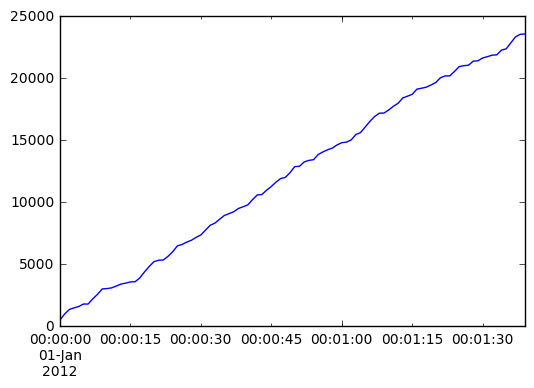

In [63]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.cumsum().plot()
display(ts.head())
display(ts.resample('5Min').sum())

# Categoricals

In [62]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
# convert raw grade into categorical datatype
df["grade"] = df["raw_grade"].astype("category")
# Rename the categories to more meaningful names
df["grade"].cat.categories = ["very good", "good", "very bad"]
display(df.sort_values(by="grade"))
display(df.groupby("grade").size())

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


grade
very good    3
good         2
very bad     1
dtype: int64

# Reshaping

## Pivot

In [4]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
d = pd.DataFrame(table)
d

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item1,Gold,3$,3€
3,Item1,Silver,4$,4€


In [5]:
p = d.pivot(index='Item', columns='CType', values='USD')
p

CType,Bronze,Gold,Silver
Item,,,
Item0,2$,1$,None
Item1,None,3$,4$


In [7]:
display(d[(d.Item=='Item0') & (d.CType=='Gold')].USD.values)
display(p[p.index=='Item0'].Gold.values)

array(['1$'], dtype=object)

array(['1$'], dtype=object)

In [9]:
p = d.pivot(index='Item', columns='CType')
p

pandas.core.frame.DataFrame

USD                 EU            
CType Bronze Gold Silver Bronze Gold Silver
Item                                       
Item0     2$   1$   None     2€   1€   None
Item1   None   3$     4$   None   3€     4€

In [10]:
print(p.USD[p.USD.index=='Item0'].Gold.values)

['1$']


## pivot_table
aggregate duplicate idexed rows

In [13]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
d = pd.DataFrame(table)
d

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item0,Gold,3$,3€
3,Item1,Silver,4$,4€


In [17]:
p = d.pivot_table(index='Item', columns='CType', values='USD', aggfunc=np.max)
p

CType,Bronze,Gold,Silver
Item,,,
Item0,2$,3$,None
Item1,None,None,4$


## Stacking / Unstacking
stack: pivot innermost column index --> innermost row index (taller)
unstack: pivot innermost row index --> innermost column index (wider)

In [19]:
# Row Multi-Index
row_idx_arr = list(zip(['r0', 'r0'], ['r-00', 'r-01']))
row_idx = pd.MultiIndex.from_tuples(row_idx_arr)

# Column Multi-Index
col_idx_arr = list(zip(['c0', 'c0', 'c1'], ['c-00', 'c-01', 'c-10']))
col_idx = pd.MultiIndex.from_tuples(col_idx_arr)

# Create the DataFrame
d = pd.DataFrame(np.arange(6).reshape(2,3), index=row_idx, columns=col_idx)
d = d.applymap(lambda x: (x // 3, x % 3))
display(d)

# Stack/Unstack
s = d.stack()
u = d.unstack()

display(s)
display(u)

c0              c1
           c-00    c-01    c-10
r0 r-00  (0, 0)  (0, 1)  (0, 2)
   r-01  (1, 0)  (1, 1)  (1, 2)

c0      c1
r0 r-00 c-00  (0, 0)     NaN
        c-01  (0, 1)     NaN
        c-10     NaN  (0, 2)
   r-01 c-00  (1, 0)     NaN
        c-01  (1, 1)     NaN
        c-10     NaN  (1, 2)

c0                              c1        
      c-00            c-01            c-10        
      r-00    r-01    r-00    r-01    r-00    r-01
r0  (0, 0)  (1, 0)  (0, 1)  (1, 1)  (0, 2)  (1, 2)